In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df1=pd.read_csv("/Users/hariharann/Desktop/ev/EV_Vehicles_sales_data.csv")

In [18]:
df1=df1.iloc[:, :7]
df1.head()

,Month,E- 2Wheeler,E-3Wheeler Passenger,E-3Wheeler Cargo,E-4Wheeler,E-Bus,Others
0,Dec-21,24732.0,21208.0,2162.0,2548.0,221.0,25.0
1,Jan-22,29501.0,17064.0,1898.0,3020.0,126.0,36.0
2,Feb-22,34873.0,16575.0,2516.0,2933.0,133.0,32.0
3,Mar-22,53097.0,20759.0,3169.0,3545.0,76.0,44.0
4,Apr-22,52283.0,18775.0,2322.0,2668.0,164.0,54.0


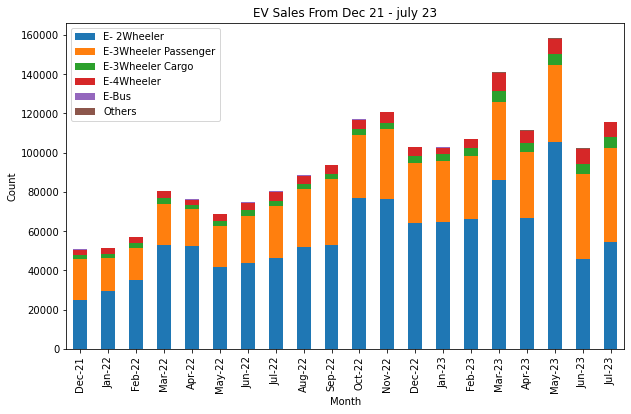

In [29]:
fig, ax = plt.subplots(figsize=(10, 6))
df1.plot(x='Month', kind='bar', stacked=True,
         title='EV Sales From Dec 21 - july 23', ax=ax)

plt.xlabel('Month')
plt.ylabel('Count')

# Display the plot
plt.show()

In [25]:
df2=pd.read_csv("/Users/hariharann/Desktop/ev/EV_state.csv")

In [26]:
#df2=df2.loc[:, ~df2.columns.str.contains('^Unnamed')]
df2.head()

,State,2W,3W Cargo,3W Passenger,4W,e-Bus,Others
0,Others,30339.0,1421.0,10596.0,1705.0,33.0,14.0
1,Assam,380.0,94.0,9064.0,18.0,0.0,5.0
2,Telangana,8604.0,235.0,127.0,704.0,0.0,0.0
3,Bihar,1648.0,197.0,8129.0,36.0,0.0,2.0
4,Delhi,7353.0,1060.0,1748.0,1581.0,203.0,0.0


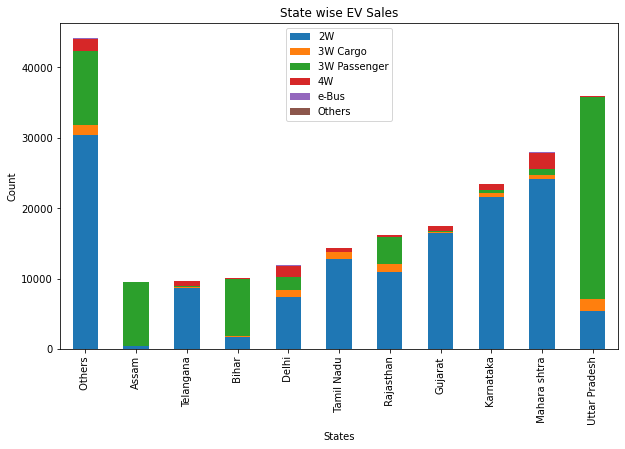

In [30]:
fig, ax = plt.subplots(figsize=(10, 6))
df2.plot(x='State', kind='bar', stacked=True,
         title='State wise EV Sales', ax=ax)

plt.xlabel('States')
plt.ylabel('Count')

# Display the plot
plt.show()

In [32]:
charge_points_state = pd.read_csv("/Users/hariharann/Desktop/ev/EV Charge Points.csv")
charge_points_state.drop([len(charge_points_state)-1], axis=0, inplace=True)
charge_points_state = charge_points_state.sort_values(["Number of Electric Vehicle Charging Sanctioned"], ascending=False)
charge_points_state.head()

,State/UT-wise,Number of Electric Vehicle Charging Sanctioned
0,Maharashtra,317
1,Andhra Pradesh,266
2,Tamil Nadu,256
3,Gujarat,228
4,Uttar Pradesh,207


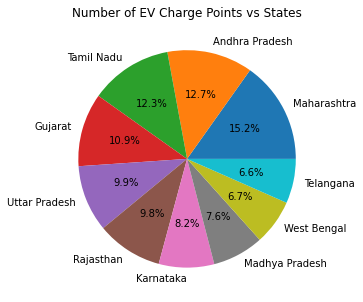

In [33]:
top_10_charge = charge_points_state[:10]
plt.figure(figsize=(5,5))
plt.title("Number of EV Charge Points vs States")
plt.pie(top_10_charge["Number of Electric Vehicle Charging Sanctioned"], labels=top_10_charge["State/UT-wise"], autopct='%1.1f%%')
plt.show()

In [59]:
df= pd.read_csv("/Users/hariharann/Desktop/ev/EV Stats-1.csv")
df.head()

,Sl. No,State,Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules,Two Wheelers (Category L2 (CMVR)),Two Wheelers (Max power not exceeding 250 Watts),Three Wheelers (Category L5 slow speed as per CMVR),Three Wheelers (Category L5 as per CMVR),Passenger Cars (Category M1 as per CMVR),Buses,Total in state
0,1,Andhra Pradesh,431,692,4689,0,0,3680,0,9492
1,2,Assam,463,138,1006,0,117,151,0,1875
2,3,Bihar,252,430,2148,6,64,271,0,3171
3,4,Chhattisgarh,613,382,2078,58,106,997,0,4234
4,5,Delhi,1395,251,5018,0,1,12695,21,19381


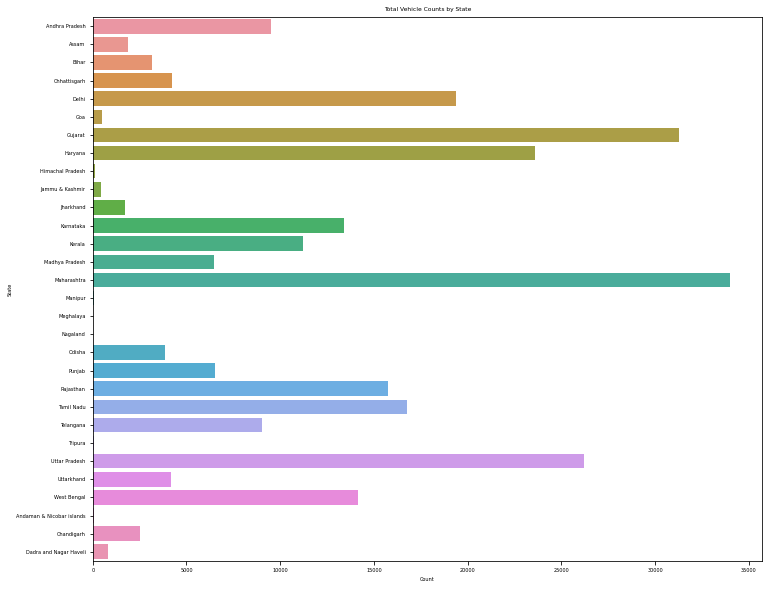

In [60]:
# Analysis 1: Total Vehicle Counts by State (Bar Plot)
plt.figure(figsize=(12, 10))
sns.barplot(data=df, y='State', x='Total in state')
plt.title('Total Vehicle Counts by State')
plt.xlabel('Count')
plt.ylabel('State')
plt.show()

<Figure size 720x432 with 0 Axes>

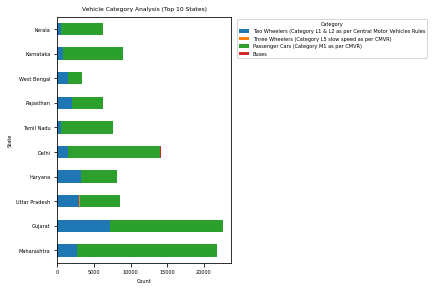

In [61]:
# Analysis 2: Vehicle Category Analysis (Horizontal Bar Plot)
top_10_states = df.nlargest(10, 'Total in state')

df_category = top_10_states[['State', 'Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules',
                             'Three Wheelers (Category L5 slow speed as per CMVR)',
                             'Passenger Cars (Category M1 as per CMVR)', 'Buses']]

plt.figure(figsize=(10, 6))
df_category.set_index('State').plot(kind='barh', stacked=True)
plt.title('Vehicle Category Analysis (Top 10 States)')
plt.xlabel('Count')
plt.ylabel('State')
plt.legend(title='Category', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.subplots_adjust(left=0.25, right=0.8)  # Adjust the left and right margins
plt.tight_layout()  # Automatically adjust the subplot parameters to avoid overlap
plt.show()

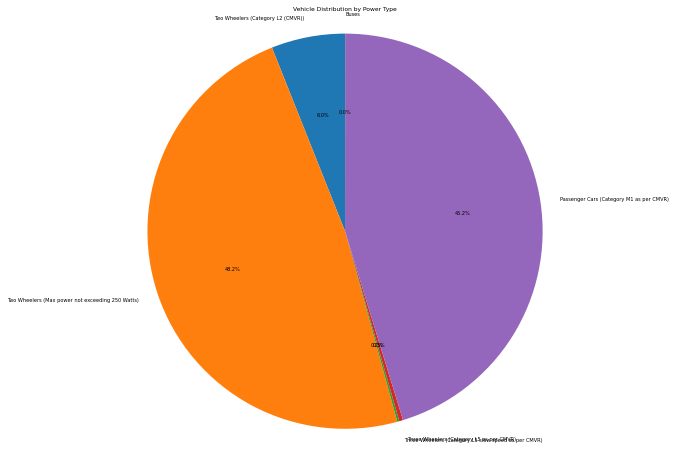

In [62]:
# Analysis 3: Vehicle Distribution by Power Type (Pie Chart)
power_columns = ['Two Wheelers (Category L2 (CMVR))', 'Two Wheelers (Max power not exceeding 250 Watts)',
                 'Three Wheelers (Category L5 slow speed as per CMVR)', 'Three Wheelers (Category L5 as per CMVR)',
                 'Passenger Cars (Category M1 as per CMVR)', 'Buses']

power_counts = df[power_columns].sum()
plt.figure(figsize=(8, 8))
plt.pie(power_counts, labels=power_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Vehicle Distribution by Power Type')
plt.axis('equal')
plt.show()

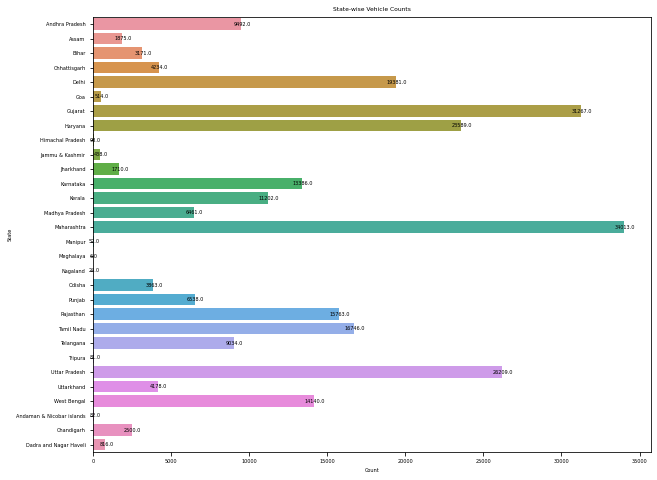

In [63]:
# Analysis 4: State-wise Vehicle Counts (Horizontal Bar Plot)
plt.figure(figsize=(10, 8))
df_without_total = df[df['State'] != 'Total']
ax = sns.barplot(data=df_without_total, y='State', x='Total in state')
plt.title('State-wise Vehicle Counts')
plt.xlabel('Count')
plt.ylabel('State')

# Add count values to each bar
for p in ax.patches:
    count = p.get_width()
    ax.annotate(count, (count + 50, p.get_y() + p.get_height() / 2), ha='center', va='center')

plt.show()

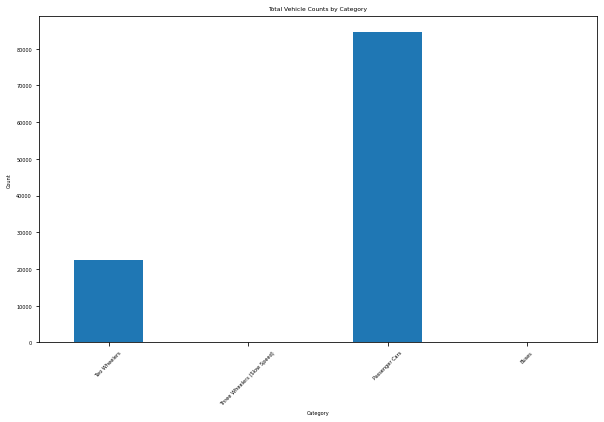

In [64]:
# Analysis 5: Total Vehicle Counts by Category (Stacked Bar Plot)
df_category_numeric = df_category.drop('State', axis=1).apply(pd.to_numeric, errors='coerce')

# Define aliases for category names
category_aliases = {
    'Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules': 'Two Wheelers',
    'Three Wheelers (Category L5 slow speed as per CMVR)': 'Three Wheelers (Slow Speed)',
    'Passenger Cars (Category M1 as per CMVR)': 'Passenger Cars',
    'Buses': 'Buses'
}

# Rename columns with aliases
df_category_numeric.rename(columns=category_aliases, inplace=True)

category_counts = df_category_numeric.sum()

plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', stacked=True)
plt.title('Total Vehicle Counts by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()



In [36]:
car_df=pd.read_csv("/Users/hariharann/Desktop/ev/EV_Car_Modified.csv")
car_df.head()

,Brand,Model,Accel,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,Price
0,Tesla,Model 3 Long Range Dual Motor,4.6 sec,233 km/h,450 km,161 Wh/km,940 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Sedan,D,5,4400000
1,Volkswagen,ID.3 Pure,10.0 sec,160 km/h,270 km,167 Wh/km,250 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,C,5,2400000
2,Polestar,2,4.7 sec,210 km/h,400 km,181 Wh/km,620 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Liftback,D,5,4515200
3,BMW,iX3,6.8 sec,180 km/h,360 km,206 Wh/km,560 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,SUV,D,5,5443200
4,Honda,e,9.5 sec,145 km/h,170 km,168 Wh/km,190 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,B,4,2639760


No handles with labels found to put in legend.


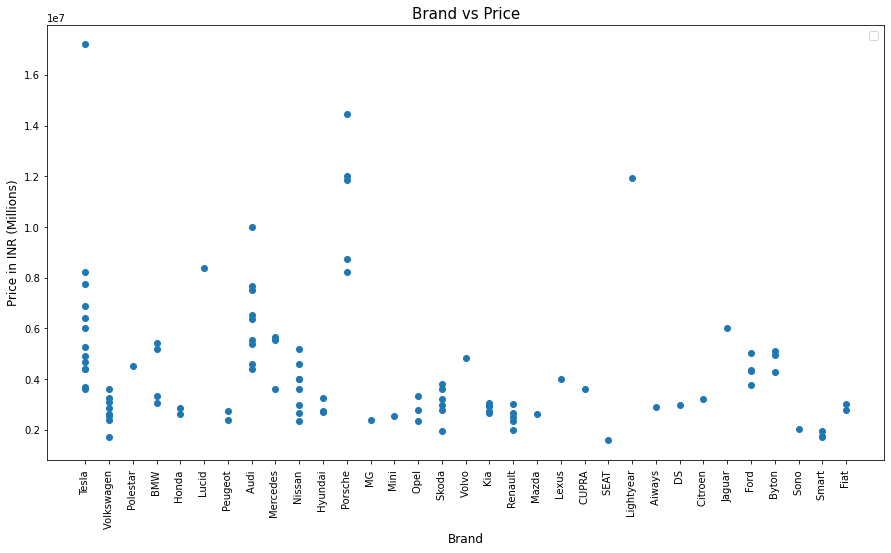

In [42]:
plt.figure(figsize=(15,8))
plt.scatter(car_df.Brand, car_df.Price)
plt.xticks(rotation=90)
plt.title("Brand vs Price", fontsize=15)
plt.ylabel("Price in INR (Millions)", fontsize=12)
plt.xlabel("Brand", fontsize=12)
plt.legend(fontsize=12)
plt.show()

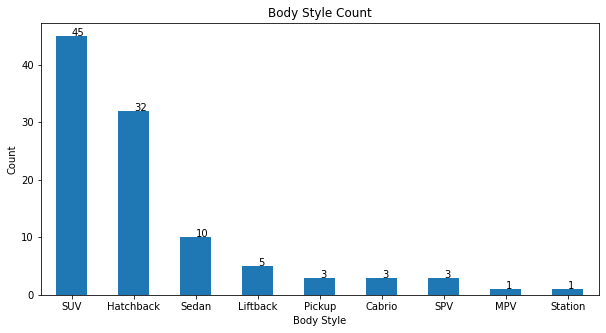

In [41]:
y = car_df.BodyStyle.value_counts()
y.plot(kind="bar", figsize=(10,5))
plt.xticks(rotation=0)
for i in range(len(y)):
    plt.text(i,y[i],y[i])
plt.xlabel("Body Style")
plt.ylabel("Count")
plt.title("Body Style Count")
plt.show()

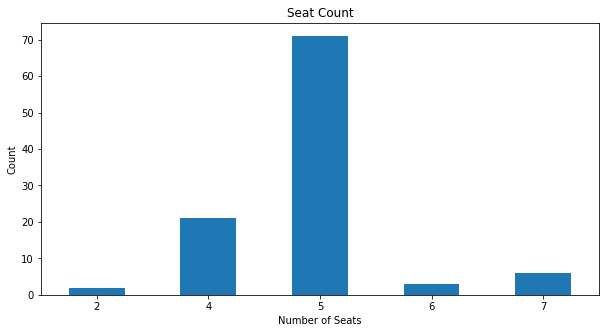

In [43]:
y = car_df.Seats.value_counts().sort_index(ascending=True)
y.plot(kind="bar", figsize=(10,5))
plt.xticks(rotation=0)
plt.xlabel("Number of Seats")
plt.ylabel("Count")
plt.title("Seat Count")
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Brand        103 non-null    int64
 1   Model        103 non-null    int64
 2   Accel        103 non-null    int64
 3   TopSpeed     103 non-null    int64
 4   Range        103 non-null    int64
 5   Efficiency   103 non-null    int64
 6   FastCharge   103 non-null    int64
 7   RapidCharge  103 non-null    int64
 8   PowerTrain   103 non-null    int64
 9   PlugType     103 non-null    int64
 10  BodyStyle    103 non-null    int64
 11  Segment      103 non-null    int64
 12  Seats        103 non-null    int64
 13  Price        103 non-null    int64
dtypes: int64(14)
memory usage: 11.4 KB


<AxesSubplot:>

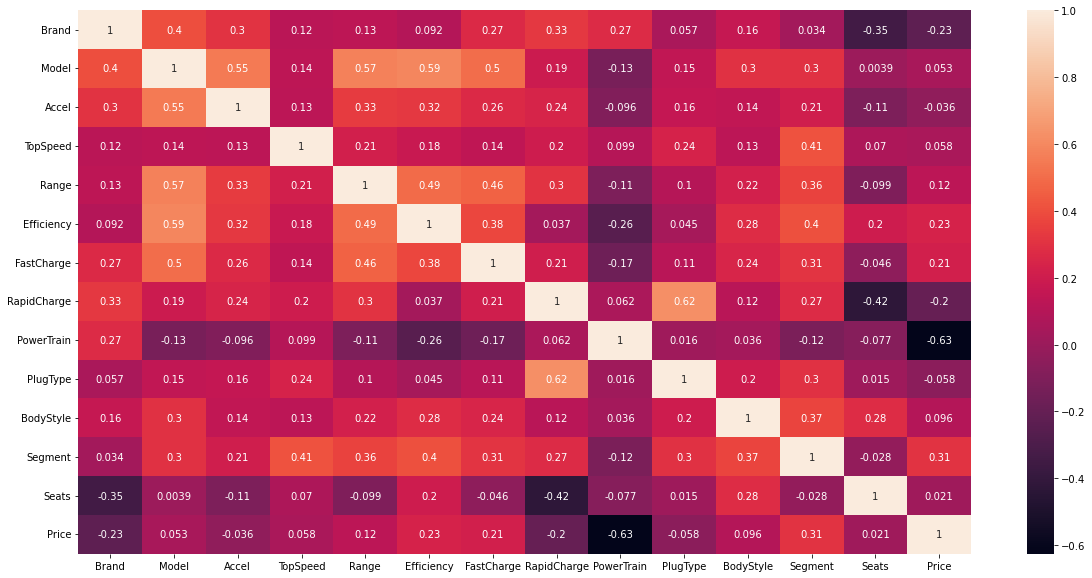

In [46]:
for label, content in car_df.items():
    if not pd.api.types.is_numeric_dtype(car_df[label]):
        lst = car_df[label].unique()
        label_map = {}
        for i in range(len(lst)):
            label_map[lst[i]] = i
        car_df[label] = car_df[label].map(label_map)
car_df.info()
plt.figure(figsize=(20,10))
sns.heatmap(car_df.corr(), annot=True)


In [47]:
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering

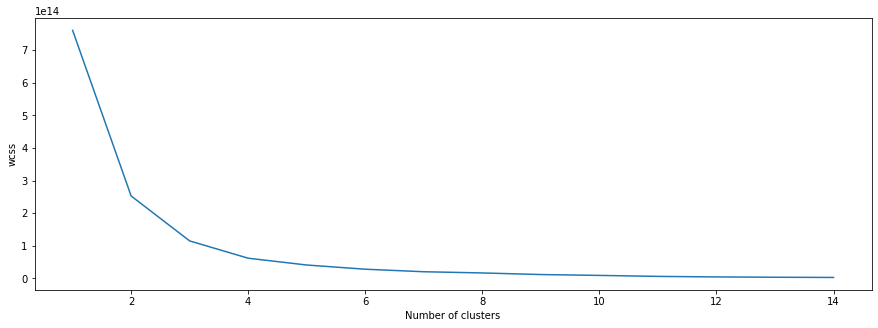

In [48]:
wcss = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(car_df)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(15, 5))
plt.plot(range(1, 15), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [67]:
kmeans = KMeans(4, init = 'k-means++', random_state=42).fit(car_df)
car_df['cluster_number'] = kmeans.labels_

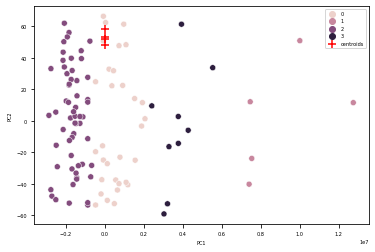

In [69]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

x = car_df.values
pca = preprocessing.scale(x)
pca = PCA(n_components=13)
pca = pca.fit_transform(x)

pf = pd.DataFrame(data=pca, columns=[f"PC{i+1}" for i in range(13)])
sns.scatterplot(data=pf, x='PC1', y='PC2', hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='+', c="r", s=50, label='centroids')
plt.legend()
plt.show()

From the above analysis the people in the states with high GDP are most likely to go with EVs. Most of the vehicles sold are the passenger vehicle rather than commercial vehicles The EV sales depend mostly on number of charging stations The market is more open towards the compact cars and bit towards larger ones

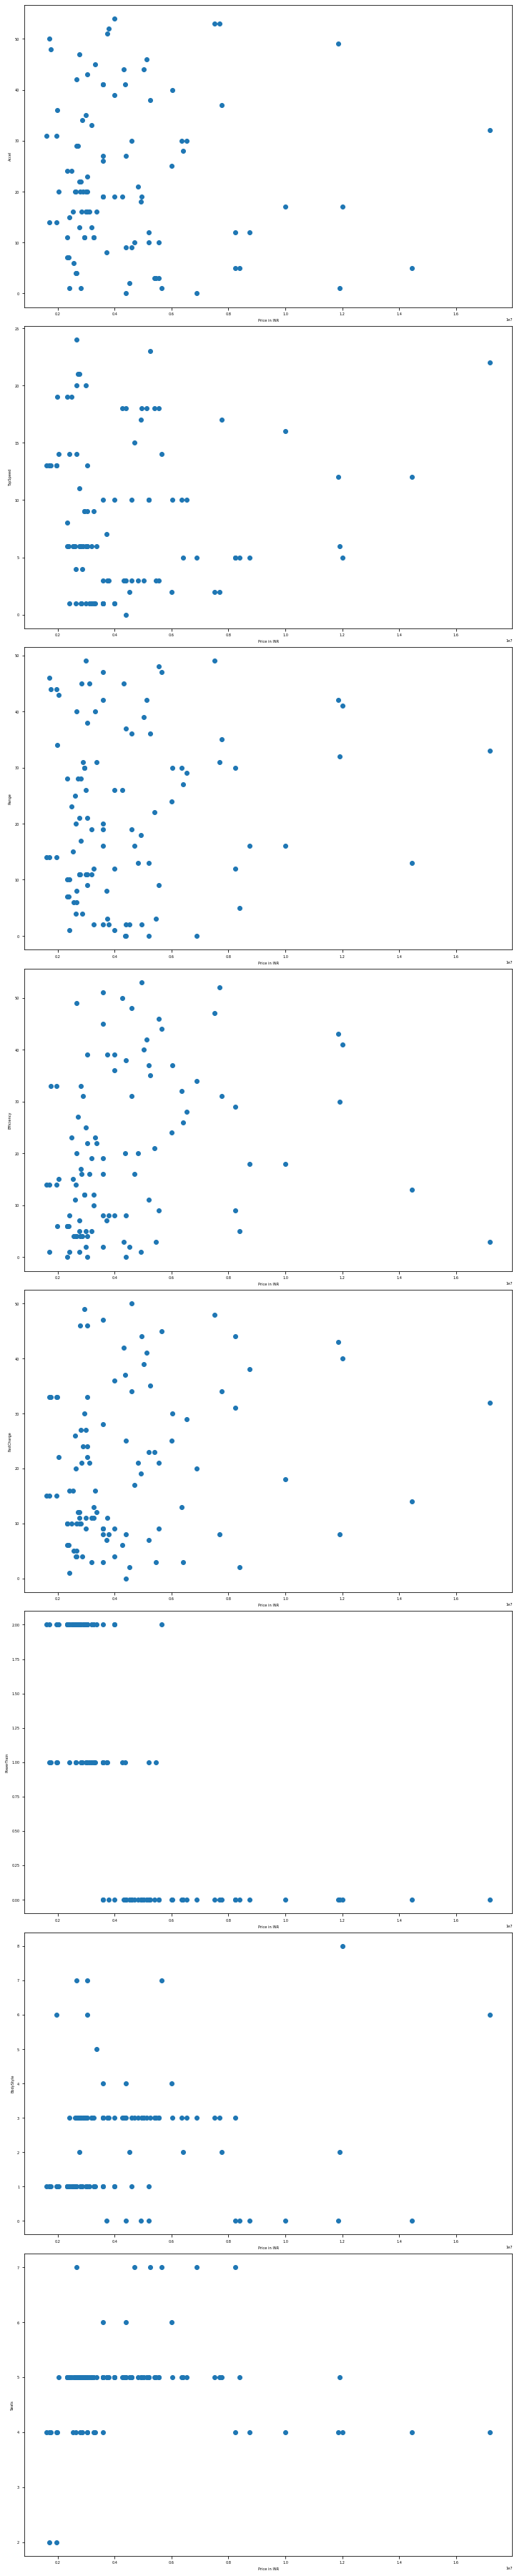

In [58]:
cols = ["Accel", "TopSpeed", "Range", "Efficiency", "FastCharge", "PowerTrain", "BodyStyle", "Seats"]
fig, axes = plt.subplots(nrows=8, ncols=1, figsize=(10, 50))
plt.rcParams.update({'font.size': 5})

for i, ax in enumerate(axes):
    ax.scatter(car_df["Price"], car_df[cols[i]])
    ax.set(xlabel="Price in INR", ylabel=cols[i])

plt.tight_layout()
plt.show()